In [72]:
# build graph pool with the following structure 
# graph_pool = {'graphs': {gid: { 
#                          'nodes': {nodeid: 'label'},
#                          'edges': [{'source': -1, 'target': -1}]}}}
import pandas as pd
import os
import numpy as np

cwd = os.getcwd()
print(cwd)
# just for refrences
# conver timestamp to string df['sts'] = pd.to_datetime(df['submitTime'], unit='ms')
# give seconds of ts: df['timestamp'].dt.second

/home/maniaa/ashes


In [66]:
df = pd.read_csv('code/dags.csv', index_col='index')
print(df.columns)


Index(['submitTime', 'dag', 'workflow.id', 'nnodes', 'nedges'], dtype='object')


In [67]:
time_granularity= 6*3600*1000
df['epochts'] = (df['submitTime'] - df['submitTime'].min())//(time_granularity)
print(df['epochts'].min(), df['epochts'].max())

# number of dags submitted every 6 hours, we actually divide a day into 4 time zone
cnt_dags_submitted_p15m = df.groupby('epochts')\
                             .agg({'dag':'count', 'nnodes': 'mean', 'nedges': 'mean'})\
                             .reset_index()\
                             .rename(columns={'dag':'dagcount'})
print(cnt_dags_submitted_p15m)

0 425
     epochts  dagcount    nnodes    nedges
0          0       364  2.686813  1.664835
1          1      6848  1.792932  0.788843
2          2      9375  1.466133  0.465707
3          3      4384  2.104015  1.101277
4          4      3051  2.340872  1.340216
..       ...       ...       ...       ...
410      421      2118  1.491029  0.500472
411      422      5129  1.209593  0.216027
412      423      4650  1.215914  0.215914
413      424      4809  1.169266  0.174880
414      425       332  1.063253  0.063253

[415 rows x 4 columns]


[  0  28  56  84 112 140 168 196 224 252 280 308 336 364 392 420]


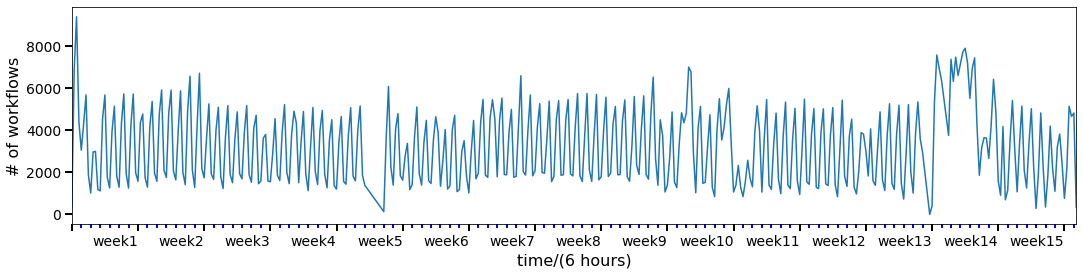

In [86]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def format_xticks(x, pos=None):
    if x == 0:
        return '';
    return 'week' + str(int(x)//28)

xticks = np.arange(0, cnt_dags_submitted_p15m['epochts'].max(), 28)
minor_ticks = np.arange(0, cnt_dags_submitted_p15m['epochts'].max(), 4)
print(xticks)
fig, ax = plt.subplots(figsize=(18, 4))
cnt_dags_submitted_p15m.plot(x='epochts', y='dagcount', ax=ax, legend=False)
plt.xticks(xticks, rotation=0)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_xticks))
#ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.set_xticks(minor_ticks, minor=True)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0, ha="right", rotation_mode="anchor") 
#plt.yticks(np.arange(0.2, 1.2, 0.2))
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4, color='b')
ax.tick_params(labelsize=14)
plt.xlabel('time/(6 hours)', fontsize=16)
plt.ylabel('# of workflows', fontsize=16)

plt.show()

In [87]:
import fbprophet as fbp



ModuleNotFoundError: No module named 'fbprophet'